In [45]:
%matplotlib widget

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize
from roboticstoolbox import *
from spatialmath import *
import time
import math

In [47]:
L1 = -165
L2 = -165

# leg = ET2.R() * ET2.ty(L1) * ET2.R() * ET2.ty(L2)
link1 = Link(ET.Ry(), name="link1")
link2 = Link(ET.tz(L1) * ET.Ry(), name="link2", parent=link1)
link3 = Link(ET.tz(L2), name="link3", parent=link2)
leg = ERobot([link1, link2, link3], name="mybot")


def get_leg_traj(pre_delay, post_delay=0, dt=0.01, is_back_leg=False):
    seed = 2
    if is_back_leg:
        seed = 1

    k = 2
    post_delay = 6 - pre_delay
    via = np.array([
        [25.2957, 0, -250],

        # immediate start, takes k seconds
        [-25.2957, 0, -250],

        # wait pre_delay second
        [-25.2957, 0, -250], # start left tail of cosine
        [-22.52254, 0, -245],
        [-19.41839, 0, -240],
        [-15.78594, 0, -235],
        [-11.11462, 0, -230],
        [-7.01172, 0, -227],
        [-3.50146, 0, -225.5],
        [0, 0, -225],
        [3.50146, 0, -225.5],
        [7.01172, 0, -227],
        [11.11462, 0, -230],
        [15.78594, 0, -235],
        [19.41839, 0, -240],
        [22.52254, 0, -245],
        [25.2957, 0, -250], # end right tail of cosine
        
        # wait post_delay second
        [25.2957, 0, -250]
    ])

    num_pts_curve = 15 - 1

    timesegments = np.array([
        k,
        pre_delay,
        *[1/(4*num_pts_curve) for i in range(num_pts_curve)],
        post_delay
    ])

    traj = mstraj(via, tsegment=timesegments, dt=dt, tacc=0)
    trajectory = traj.q

    answer_arr = leg.ikine_LM(SE3.Trans(trajectory), mask=[1,0,1,0,0,0], seed=seed).q
    q0 = answer_arr[:,0]
    q1 = answer_arr[:,1]
    print(trajectory.shape)
    return answer_arr, traj, q0, q1

FR_gait, FR_traj, FR_q0, FR_q1 = get_leg_traj(0, 0)
BL_gait, BL_traj, BL_q0, BL_q1 = get_leg_traj(2, 0, is_back_leg=True)
FL_gait, FL_traj, FL_q0, FL_q1 = get_leg_traj(4, 0)
BR_gait, BR_traj, BR_q0, BR_q1 = get_leg_traj(6, 0, is_back_leg=True)

(828, 3)
(828, 3)
(828, 3)
(828, 3)


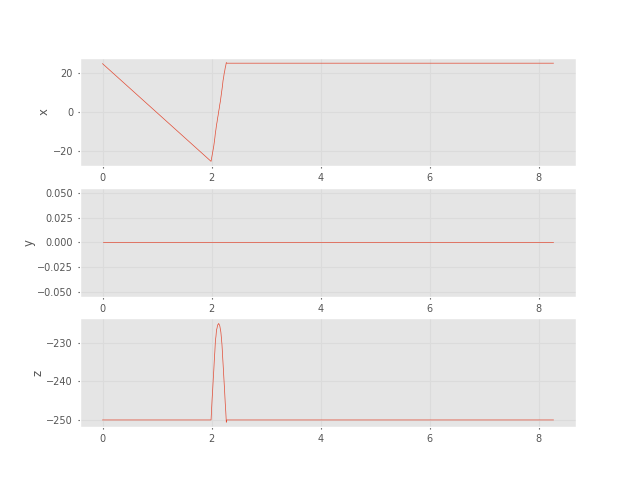

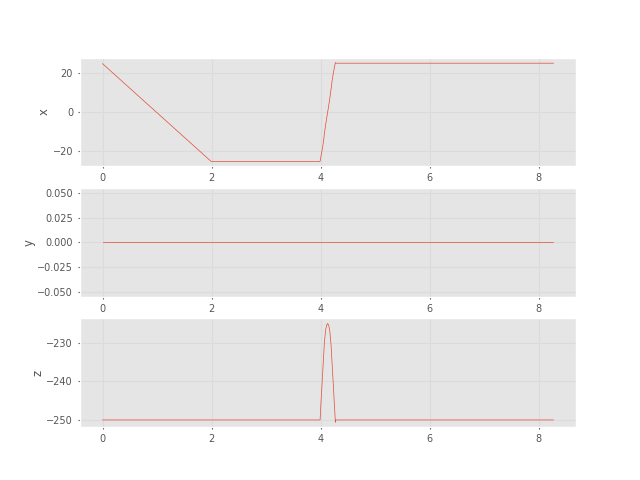

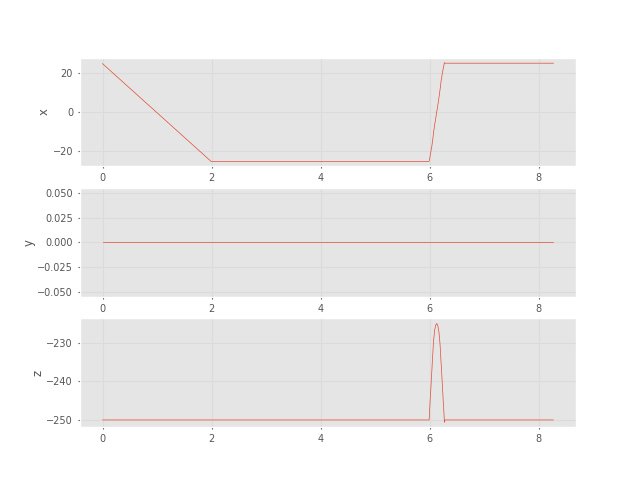

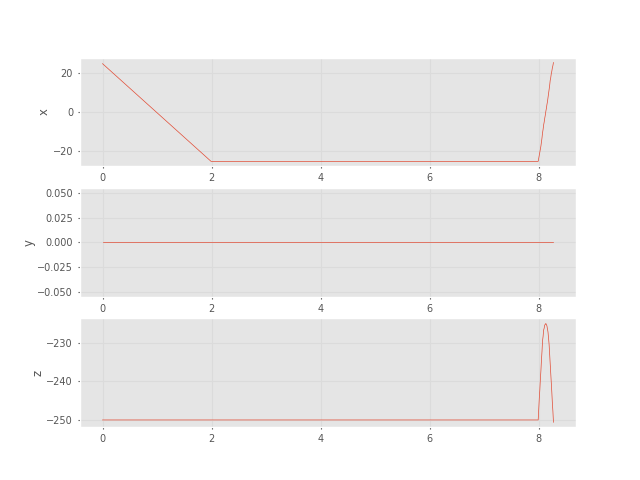

In [49]:
def graph_xyz(traj, dt=0.01):
    x_coords = traj.q[:,0]
    y_coords = traj.q[:,1]
    z_coords = traj.q[:,2]
    t = np.arange(0, traj.t[-1]+dt, dt)

    # print(t.shape)
    # print(x_coords.shape)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    ax1.set_ylabel("x")
    ax1.plot(t, x_coords)
    ax2.set_ylabel("y")
    ax2.plot(t, y_coords)
    ax3.set_ylabel("z")
    ax3.plot(t, z_coords)
    plt.show()
    
graph_xyz(FR_traj)
graph_xyz(BL_traj)
graph_xyz(FL_traj)
graph_xyz(BR_traj)

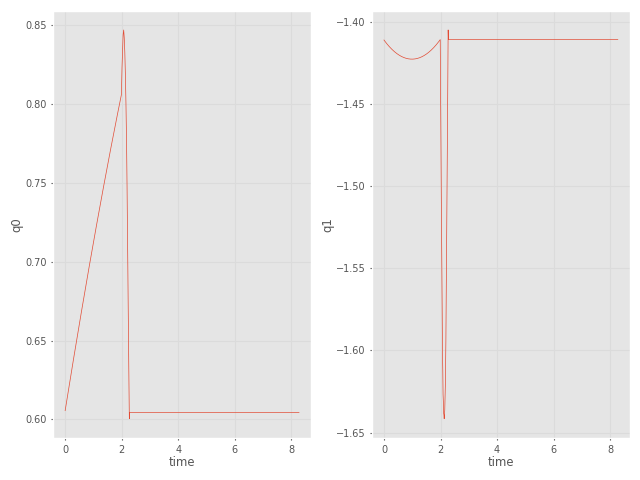

In [50]:
def graph_angles(traj, q0, q1, dt=0.01):
    t = np.arange(0, traj.t[-1]+dt, dt)
    fig, ax = plt.subplots(1, 2)

    ax[0].set_ylabel("q0")
    ax[0].set_xlabel("time")
    ax[0].plot(t, q0)

    ax[1].set_ylabel("q1")
    ax[1].set_xlabel("time")
    ax[1].plot(t, q1)

    plt.tight_layout()
    plt.show()

graph_angles(FR_traj, FR_q0, FR_q1)

In [51]:
import os
with np.printoptions(threshold=np.inf):
    prefix_path = "trajectories/"
    file_path = "slow_walk_all_legs"
    np.save(prefix_path + file_path, np.array([FR_gait, BL_gait, FL_gait, BR_gait]))

In [52]:
"""
import os
with np.printoptions(threshold=np.inf):
    print(f"Back leg: {BACK_LEG}")
    postfix = "BACK" if BACK_LEG else "FRONT"
    prefix_path = "trajectories/"
    file_path = "short_curve"
    np.save(prefix_path + file_path + postfix, )
"""

'\nimport os\nwith np.printoptions(threshold=np.inf):\n    print(f"Back leg: {BACK_LEG}")\n    postfix = "BACK" if BACK_LEG else "FRONT"\n    prefix_path = "trajectories/"\n    file_path = "short_curve"\n    np.save(prefix_path + file_path + postfix, )\n'